# MORPHOMNIST

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from collections import defaultdict

In [2]:
path2models = "/neurospin/psy_sbox/analyses/2023_pauriau_sepmod/models/morphomnist"
path2inputs = f"/neurospin/psy_sbox/analyses/2023_pauriau_sepmod/data/morpho_mnist"

In [3]:
plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "serif"

In [4]:
path_to_exp = "/neurospin/psy_sbox/analyses/2023_pauriau_sepmod/models/morphomnist/20250317_strong_encoder"

In [5]:
epoch = 250
df_test = pd.read_csv(os.path.join(path_to_exp, "strong_encoder_test.csv"))

In [8]:
df_test = df_test.replace({"width": "largeur", 
                           "height": "hauteur",
                           "slant": "angle",
                           "length": "longueur",
                           "thickness_img": "épaisseur",
                           "area_img": "aire"})

In [9]:
df_test.head()

,Unnamed: 0,epoch,set,label,encoder,score
0,0,250,test,label,strong,0.267847
1,1,250,test,label,strong_common,0.907804
2,2,250,test,aire,strong,0.900243
3,3,250,test,aire,strong_common,0.289837
4,4,250,test,longueur,strong,0.447198


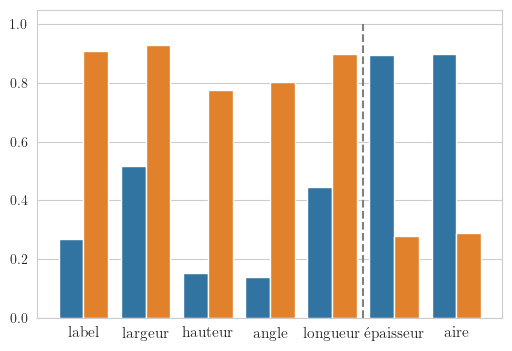

In [27]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    targets = ["label", "largeur", "hauteur", "angle", "longueur", "épaisseur", "aire"]
    sns.barplot(data=df_test, x="label", y="score", hue="encoder", ax=ax, order=targets)
    #ax[i].set_title(f"Modality: {modality.upper()}")
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.tick_params(axis='x', which='major', labelsize=11)
    ax.get_legend().remove()
    ax.vlines(x=4.5, ymin=0, ymax=1.0, color="gray", linestyles="dashed")
plt.show()

In [28]:
fig.savefig("/neurospin/dico/pauriau/tmp/morpho_mnist_results.svg", transparent=True)